## Classification of CIFAR-10 Dataset by using Convolutional neural network

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

I used Convolutional neural network to classify each image into one of the 10 classes. 

The best accuracy is 76.67 in validation set.

In [7]:
# Import necessary modules

import numpy
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from keras.layers import Convolution2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.layers import Dense, Activation

### Data Cleaning

In [8]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)


### Simple Convolutional Neural Network

In [66]:
def simple_neural_network_cov2D():
    width = 2
    height = 2
    classes = 10
    drop_rate = 0.2
    feture_maps = 10
    filter_size=2
    num_full_connected_layers=128
    
    optimizer = 'adam'
    batch_size =100
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(drop_rate))
    
    model.add(Flatten())    
    
    model.add(Dense(500, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    

    return model 






In [67]:
model = simple_neural_network_cov2D()

In [68]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(X_train, y_train, nb_epoch=20, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 110s - loss: 1.6367 - acc: 0.4047 - val_loss: 1.3245 - val_acc: 0.5362
Epoch 2/20
40000/40000 [==============================] - 109s - loss: 1.2021 - acc: 0.5728 - val_loss: 1.0873 - val_acc: 0.6214
Epoch 3/20
40000/40000 [==============================] - 109s - loss: 1.0273 - acc: 0.6376 - val_loss: 0.9930 - val_acc: 0.6536
Epoch 4/20
40000/40000 [==============================] - 109s - loss: 0.9058 - acc: 0.6830 - val_loss: 0.9001 - val_acc: 0.6880
Epoch 5/20
40000/40000 [==============================] - 109s - loss: 0.8088 - acc: 0.7169 - val_loss: 0.8548 - val_acc: 0.7052
Epoch 6/20
40000/40000 [==============================] - 109s - loss: 0.7268 - acc: 0.7418 - val_loss: 0.8171 - val_acc: 0.7172
Epoch 7/20
40000/40000 [==============================] - 109s - loss: 0.6517 - acc: 0.7723 - val_loss: 0.8011 - val_acc: 0.7280
Epoch 8/20
40000/40000 [=======================

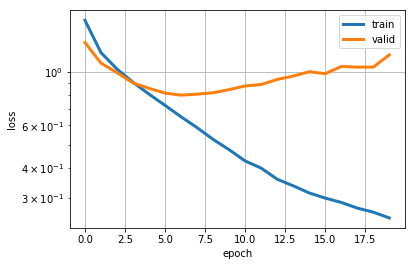

In [70]:
# plot train and test set

import matplotlib.pyplot as plt

f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

### More Complicated Neural Network

Make models more complicated in order to increase acuracy

In [28]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)

In [30]:
def neural_network_cov2D():
    
    batch_size =100
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.1))
    
    model.add(Flatten())    
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(num_classes, activation='softmax'))
    

    return model 

In [31]:
model = neural_network_cov2D()

In [32]:
X_train.shape

(50000, 3, 32, 32)

In [33]:
num_epochs = 30
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay = decay_rate , nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , nb_epoch=num_epochs)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 30, 30)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 14, 14)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 7, 7)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 7, 7)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 6, 6)         32896     
__________

NameError: name 'plt' is not defined

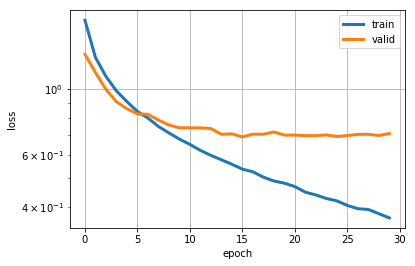

In [34]:
import matplotlib.pyplot as plt
#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

### Convolutional Neural Network with Dropouts

Adding Dropouts to prevent overfitting

In [35]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)

In [43]:
def neural_network_cov2D_dropout1():
    
    batch_size =100
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.15))
    
    model.add(Flatten())    
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(num_classes, activation='softmax'))
    

    return model 

In [44]:
model = neural_network_cov2D_dropout1()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 30, 30)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 14, 14)        8256      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 7, 7)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 64, 7, 7)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 6, 6)         32896     
__________

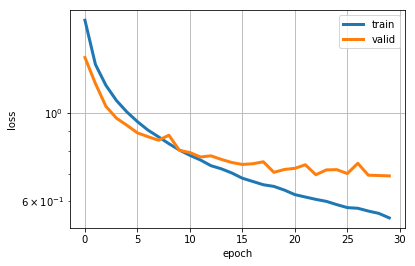

In [45]:
num_epochs = 30
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay = decay_rate , nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , nb_epoch=num_epochs)

#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

### Convolutional neural network with Deeper Layers and Dropouts

In [46]:
def neural_network_cov2D_dropout2():
    
    batch_size =100
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())    
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(num_classes, activation='softmax'))
    

    return model 

In [47]:
model = neural_network_cov2D_dropout2()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 30, 30)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 14, 14)        8256      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 7, 7)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 64, 7, 7)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 6, 6)         32896     
__________

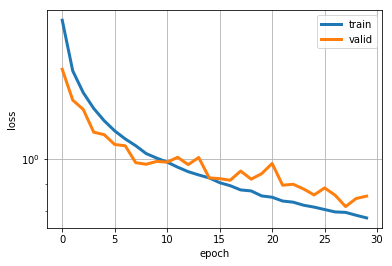

In [48]:
num_epochs = 30
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay = decay_rate , nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , nb_epoch=num_epochs)

#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

### Use Adam Optimizer

In [9]:
def neural_network_cov2D_dropout_adamOpt():
    
    batch_size =100
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.15))
    
    model.add(Flatten())    
    
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(num_classes, activation='softmax'))
    

    return model 

In [10]:
model = neural_network_cov2D_dropout_adamOpt()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 14, 14)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 7, 7)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 7, 7)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 6, 6)         32896     
__________

/home/tmatsuzawa/anaconda2/lib/python2.7/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 388s - loss: 1.7090 - acc: 0.3556 - val_loss: 1.3592 - val_acc: 0.5022
Epoch 2/50
50000/50000 [==============================] - 393s - loss: 1.3561 - acc: 0.5063 - val_loss: 1.2371 - val_acc: 0.5405
Epoch 3/50
50000/50000 [==============================] - 429s - loss: 1.1972 - acc: 0.5704 - val_loss: 1.1035 - val_acc: 0.6095
Epoch 4/50
50000/50000 [==============================] - 468s - loss: 1.1002 - acc: 0.6079 - val_loss: 1.0112 - val_acc: 0.6410
Epoch 5/50
50000/50000 [==============================] - 467s - loss: 1.0356 - acc: 0.6351 - val_loss: 0.9769 - val_acc: 0.6587
Epoch 6/50
50000/50000 [==============================] - 491s - loss: 0.9901 - acc: 0.6496 - val_loss: 0.9075 - val_acc: 0.6790
Epoch 7/50
50000/50000 [==============================] - 503s - loss: 0.9488 - acc: 0.6648 - val_loss: 0.8952 - val_acc: 0.6810
Epoch 8/50
50000/50000 [=======================

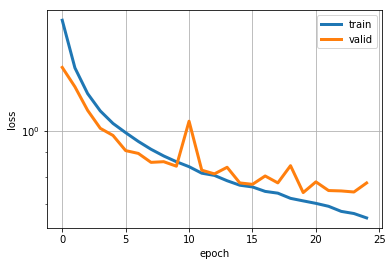

In [11]:
num_epochs = 50
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001, decay = 1e-5), metrics=['accuracy'])
print model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , nb_epoch=num_epochs, 
                 callbacks = [EarlyStopping(min_delta = 0.001, patience = 4)])

#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

In [24]:
def neural_network_cov2D_dropout_adamOpt1():
    
    batch_size =100
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    
    model.add(Dropout(0.15))
    
    model.add(Flatten())    
    
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(num_classes, activation='softmax'))
    

    return model 

In [25]:
model = neural_network_cov2D_dropout_adamOpt1()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 30, 30)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 14, 14)        8256      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 64, 7, 7)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 64, 7, 7)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 128, 6, 6)         32896     
__________

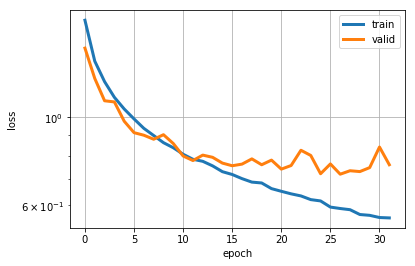

In [26]:
num_epochs = 50
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001, decay = 1e-5), metrics=['accuracy'])
print model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test) , nb_epoch=num_epochs, 
                 callbacks = [EarlyStopping(min_delta = 0.001, patience = 4)])

#display loss 
f=plt.figure()
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()